In [ ]:
#https://github.com/pdichone/advanced-rag-techniques.git

## Начальная настройка:
подготовка необходимых библиотек. Это займёт несколько минут. \\
После их загрузки надо будет сделать рестарт сессии

In [ ]:
!pip install  chromadb pypdf langchain langchain-community langchain-text-splitters sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.5 MB/s eta 0:00

Попробуйте несколько разных вопросов, посмотрите, как модель выбирает ответы:

###Загрузка данных:

Теперь попробуем c реальным документом. Мы загрузим годовой финансовый отчет для акционеров корпорации Microsoft в формате PDF-документа

ваш URL-адрес для совместного использования документа на Google Drive выглядит примерно так:

`https://drive.google.com/file/d/`**1LDRlyZaZTF-bxHjBDEiL2obMxYHtf3YT**`/view?usp=sharing`

отсюда надо извлечь идентификатор файла, часть между /d/ и /view, и поместить его в новый URL-адрес, который выглядит так:

`https://drive.google.com/uc?export=download&id=`**1LDRlyZaZTF-bxHjBDEiL2obMxYHtf3YT**

Извлечем из PDF текст, и посмотрим на первую страницу

In [ ]:
from pypdf import PdfReader
def extract_text_from_pdf(file_path):
#     """
#     Вытакивает текст из файла PDF.

#     Args:
#     file_path (str): The path to the PDF file.

#     Returns:
#     str: The extracted text.
#     """
      text = []
      with open(file_path, "rb") as f:
          pdf = PdfReader(f)
          for page_num in range(pdf.get_num_pages()):
              page = pdf.get_page(page_num)
              text.append(page.extract_text().strip())
      return text

In [ ]:
def word_wrap(text, width=87):
    """
    Форматирует текст на указанную ширину.

    Args:
    text (str): Текст для форматирования.
    width (int): Новая ширина текста.

    Returns:
    str: форматированный текст.
    """
    return "\n".join([text[i : i + width] for i in range(0, len(text), width)])

files = []
for name_file in ["200-receptov-blyud-na-otkrytom-vozduxe-3-33.pdf", "wbook_of-2-26.pdf", "Салаты.pdf"]:
  files.append(extract_text_from_pdf(name_file))
# Filter th,e empty strings
texts = [text for text in files if len(text) > 2]
print(
    word_wrap(
        texts[0],
        width=100,
    )
)

Блюда из мяса 
 
Шашлык из телятины, маринованной в айране 
 
Ингредиенты  
Телятина – 2 кг 
Репчаты
й лук – 7 шт. 
Айран – 1 л 
Приправы для мяса – 5 г 
Черный молотый перец и соль по вкусу 
 
Способ 
приготовления  
Телятину промойте и нарежьте порционными кусочками, лук – кольцами. 
Подготовленные 
ингредиенты соедините, посолите, поперчите и посыпьте приправами 
для мяса. Залейте все айраном, хор
ошо перемешайте, накройте крышкой, сверху положите 
груз и держите в прохладном месте 12 часов. Посл
е этого нанижите телятину на шампуры, 
чередуя с кольцами лука, и жарьте над углями. Готовый шашлык 
подайте на стол с 
 
Шашлык из телятины с салом 
 
Ингредиенты:  
Телятина – 1,5 кг 
Сало – 300 г 
Ч
еснок – 6 зубчиков 
Лимонный сок – 50 мл 
Черный молотый перец и соль по вкусу 
 
Способ приготовлен
ия  
Телятину нарежьте порционными кусочками (45–50 г), хорошо отбейте, натрите солью, 
черным перце
м и толченым чесноком, сбрызните свежеотжатым лимонным соком и держите 
в прохладном месте 

Подключим модель OpenAI

In [ ]:
from openai import OpenAI
import numpy as np
import chromadb
import pandas as pd


from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')
client = OpenAI(api_key=openai_api_key)




In [ ]:
client.models.list()

SyncPage[Model](data=[Model(id='o3-mini', created=1737146383, object='model', owned_by='system'), Model(id='gpt-4o-mini-audio-preview-2024-12-17', created=1734115920, object='model', owned_by='system'), Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview', created=1727460443, object='model', owned_by='system'), Model(id='o1-mini-2024-09-12', created=1725648979, object='model', owned_by='system'), Model(id='o1-mini', created=1725649008, object='model', owned_by='system'), Model(id='omni-moderation-latest', created=1731689265, object='model', owned_by='system'), Model(id='gpt-4o-mini-audio-preview', created=1734387424, object='model', owned_by='system'), Model(id='omni-moderation-2024-09-26', created=1732734466, object='model', owned_by='system'), Model(id='g

###Разбиение данных на части:

Разделим текст на более мелкие фрагменты с использованием инструментов RecursiveCharacterTextSplitter и SentenceTransformersTokenTextSplitter из **Langchain** *. \\

Этот шаг гарантирует, что текст разбит на управляемые сегменты, учитывая ограничения по размеру токенов больших языковых моделей
___________________________________
**LangChain** — это фреймворк (библиотека) с открытым исходным кодом, предназначенный для упрощения разработки приложений, использующих большие языковые модели (LLM), такие как GPT-3, LLaMa, и другие. Он предоставляет инструменты для соединения LLM с различными источниками данных (базы данных, API, документы) и позволяет создавать цепочки (chains) последовательных вызовов LLM и других компонентов, реализуя сложные сценарии взаимодействия.

По сути, LangChain помогает "подружить" мощь языковых моделей с внешним миром и вашими данными.

In [ ]:
# Разделение текста на более мелкие фрагменты

from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    SentenceTransformersTokenTextSplitter,
)

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""], chunk_size=1000, chunk_overlap=0
)
character_split_texts = character_splitter.split_text("\n\n".join(texts))



### Токенизация фрагментов текста

In [ ]:
token_splitter = SentenceTransformersTokenTextSplitter(
    chunk_overlap=0, tokens_per_chunk=256
)
token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)
# выведем один chunk
print("Один из отрывков текста:\n", word_wrap(token_split_texts[10]))
print(f"\nВсего отрывков: {len(token_split_texts)}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Один из отрывков текста:
 телятину промоите, нарежьте крупными кусками, нанижите на шампур, смажьте оливковым мас
лом и жарьте над углями, постоянно переворачивая. готовое мясо нарежьте порционными кус
ками поперек волокон немного наискосок, выложите на блюдо, посолите, поперчите и смажьт
е аджикои. отдельно подаите зелень и с

Всего отрывков: 526


### Генерация эмбеддингов из полученных токенов
Генерация embeddings для каждого текстового фрагмента с использованием функции [sentence transformer embedding](https://docs.trychroma.com/docs/embeddings/embedding-functions)

**Эмбеддинги** — это способ представления любых данных, в виде векторов многомерного пространства, что делает их идеальными для работы со всеми видами инструментов и алгоритмов на основе ИИ. Эмбеддинги могут представлять текст, изображения, аудио и видео. Существует множество вариантов создания эмбеддингов, как локально с использованием установленной библиотеки, так и путем вызова API.

Библиотека **ChromaDB** * предоставляет легкие оболочки вокруг популярных поставщиков эмбеддингов, что упрощает их использование в ваших приложениях. Вы можете задать эмбеддинг-функцию при создании коллекции Chroma, которая будет использоваться автоматически, или можете вызывать их напрямую самостоятельно.
________________________________
**ChromaDB** — это векторная база данных с открытым исходным кодом, предназначенная для хранения и быстрого поиска векторных представлений (эмбеддингов) данных, что делает её полезной для задач, связанных с искусственным интеллектом, таких как семантический поиск и рекомендательные системы. Она оптимизирована для работы с высокоразмерными данными и позволяет находить ближайшие векторы по сходству.

####Аналоги ChromaDB:

**FAISS** (Facebook AI Similarity Search): Библиотека от Facebook, специализирующаяся на эффективном поиске сходства и кластеризации плотных векторов.

**Pinecone**: Управляемая векторная база данных, предлагающая масштабируемость и простоту использования через API.

**Weaviate**: Векторная поисковая система с открытым исходным кодом, поддерживающая семантический поиск, классификацию изображений и многое другое.

**Milvus**: База данных векторного поиска с открытым исходным кодом, разработанная для масштабируемости и производительности.

**Qdrant**: Векторная поисковая система и векторная база данных, предлагает удобный API со множеством дополнительных функций


In [ ]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
# выведем один эмбеддинг
em = embedding_function([token_split_texts[10]])

print("Эмбеддинг одного из отрывков:\n", em)
print(np.array(em).shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Эмбеддинг одного из отрывков:
 [array([ 2.81786844e-02, -2.33601909e-02,  1.20546967e-02,  6.38986379e-03,
       -6.72174320e-02,  5.98840276e-03,  2.57801320e-02, -2.35471805e-03,
       -4.26869188e-03,  1.67817250e-02,  3.24401706e-02,  5.16902730e-02,
        1.57804228e-02, -1.76879466e-02,  5.82562387e-02, -5.72491959e-02,
        1.42347710e-02,  1.16685927e-02,  2.01749373e-02,  4.76736538e-02,
        3.94327119e-02, -3.31593230e-02,  7.06578195e-02, -4.20796759e-02,
       -3.22484709e-02, -3.85859087e-02, -5.99582084e-02,  8.89000716e-04,
        5.31243347e-03,  8.08678493e-02, -2.35971417e-02, -8.45637452e-03,
        3.23570147e-02, -9.00044665e-02,  2.34299875e-03, -7.42653478e-03,
        2.24807523e-02,  6.73622498e-03, -2.81222891e-02,  1.29449904e-01,
       -3.51593271e-02,  2.36362517e-02, -1.27909839e-01,  4.73516583e-02,
       -3.49926315e-02,  1.71147250e-02, -8.24031904e-02,  1.87802315e-03,
       -7.41754547e-02, -5.38314767e-02, -2.44565234e-02, -4.2676092

In [ ]:
# Настройка векторной базы данных:

# Инициализация клиента ChromaDB
chroma_client = chromadb.Client()
# создание коллекции для хранения текстовых фрагментов и соответствующих embeddings.
chroma_collection = chroma_client.create_collection(
    "priem", embedding_function=embedding_function
)
# Добавление текстовых фрагментов и embeddings в коллекцию ChromaDB
# Так мы создаем векторное хранилище

ids = [str(i) for i in range(len(token_split_texts))]
chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()


526

### Обработка запросов:
Посмотрим пример входного запроса и передачи его в большую языковую модель для поиска подходящего фрагмента в заданном тексте.

В этом примере запрос снабжается системным промптом, в котором задаётся роль модели и паттерн желаемого ответа.

Это будет "гипотетический" ответ, придуманный моделью и не имеющий отношения к реальному документу

In [ ]:
import umap
original_query ="Как приготовить салат оливье?"

def augment_query_generated(query, model="gpt-4o-mini"):#"gpt-3.5-turbo"
    prompt = """Вы работаете в ресторане.
   Приведите пример ответа на этот вопрос, который можно найти в представленных документах."""
    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {"role": "user", "content": query},
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

def project_embeddings(embeddings, umap_transform):
    """
    Проецирует полученные эмбеддинги с использованием предоставленного трансформера UMAP.

    Аргументы:
    embeddings (numpy.ndarray): эмбеддинги для проецирования.
    umap_transform (umap.UMAP): обученный трансформер UMAP.

    Возвращает:
    numpy.ndarray: спроецированные эмбеддинги.
    """
    projected_embeddings = umap_transform.transform(embeddings)
    return projected_embeddings



hypothetical_answer = augment_query_generated(original_query)

joint_query = f"{original_query}\n\n {hypothetical_answer}"
print(word_wrap(joint_query))

results = chroma_collection.query(
    query_texts=joint_query, n_results=5, include=["documents", "embeddings"]
)
retrieved_documents = results["documents"][0]


# for doc in retrieved_documents:
#     print(word_wrap(doc))
#     print("")

embeddings = chroma_collection.get(include=["embeddings"])["embeddings"]
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)


retrieved_embeddings = results["embeddings"][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(
    original_query_embedding, umap_transform
)
projected_augmented_query_embedding = project_embeddings(
    augmented_query_embedding, umap_transform
)
projected_retrieved_embeddings = project_embeddings(
    retrieved_embeddings, umap_transform
)


Как приготовить салат оливье?

 Для приготовления салата оливье вам понадобятся следующ
ие ингредиенты:

- Картофель — 3-4 шт.
- Морковь — 2 шт.
- Яйца — 4 шт.
- Горошек консе
рвированный — 1 банка (400 г)
- Куриное филе или колбаса (например, докторская) — 300 г

- Огурцы маринованные — 3 шт.
- Майонез — 200-250 г
- Соль, перец — по вкусу
- Укроп и
ли петрушка — для украшения (по желанию)

Приготовление:

1. Отварите картофель и морко
вь в мундире до готовности. После того как они остынут, очистите и нарежьте кубиками.
2
. Отварите яйца вкрутую, охладите, очистите и нарежьте.
3. Вареное куриное филе или кол
басу нарежьте кубиками.
4. Огурцы также нарежьте кубиками.
5. В глубокой миске соединит
е все ингредиенты: картофель, морковь, яйца, курицу (или колбасу), огурцы и горошек.
6.
 Добавьте майонез, посолите и поперчите по вкусу.
7. Тщательно перемешайте салат.
8. Да
йте настояться в холодильнике минимум 30 минут перед подачей.
9. Подавайте, украсив зел
енью.

Приятного аппетита!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Посмотрите, как выглядит проекция многомерного семантического пространства.
* **Серые точки** - эмбеддинги документа
* **Зеленые кружки** - эмбеддинги фрагментов текста, извлеченные по запросу
* **красные крестики** - эмбеддинги исходного запроса
* **оранжевые крестики** - эмбеддинги расширенного запроса. \
Они должны попасть в область, наиболее близкую к извлеченным эмбеддингам. Здесь может использоваться быстрый алгоритм кластеризации, например k-means

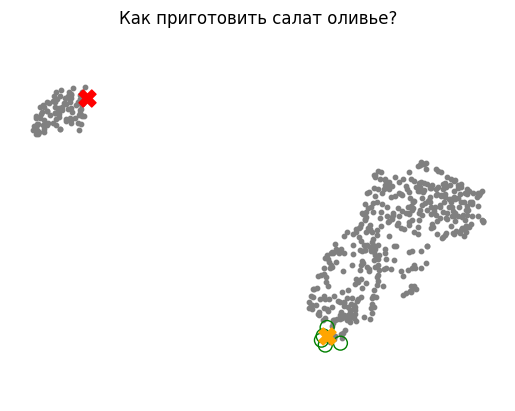

In [ ]:

import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()

plt.scatter(
    projected_dataset_embeddings[:, 0],
    projected_dataset_embeddings[:, 1],
    s=10,
    color="gray",
)
plt.scatter(
    projected_retrieved_embeddings[:, 0],
    projected_retrieved_embeddings[:, 1],
    s=100,
    facecolors="none",
    edgecolors="g",
)
plt.scatter(
    projected_original_query_embedding[:, 0],
    projected_original_query_embedding[:, 1],
    s=150,
    marker="X",
    color="r",
)
plt.scatter(
    projected_augmented_query_embedding[:, 0],
    projected_augmented_query_embedding[:, 1],
    s=150,
    marker="X",
    color="orange",
)

plt.gca().set_aspect("equal", "datalim")
plt.title(f"{original_query}")
plt.axis("off")
plt.show()  # display the plot

### Генерация ответа
Теперь попробуем использовать извлеченные из нашего документа отрывки для более точного ответа на вопрос.

* Передача извлеченных документов и исходного запроса большой языковой модели для создания окончательного ответа.
* Языковая модель использует извлеченные отрывки как контекст для предоставления обоснованного ответа

In [ ]:
original_query = "Как правильно подать блюдо?"


def generate_multi_query(query, model="gpt-4o-mini"):#gpt-3.5-turbo"

    prompt = """
    Вы менеджер в ресторане.
    Ваши подчиненные интересуются правильной подачей блюд.
    Для данного вопроса предложите до трех связанных вопросов, чтобы помочь им найти необходимую информацию.
    Задавайте краткие однотематические вопросы (без составных предложений), которые охватывают различные аспекты темы.
    Убедитесь, что каждый вопрос является полным и напрямую связан с исходным запросом.
    Каждый вопрос записывайте на отдельной строке без нумерации.
    Все результаты пишите на языке вопроса.
    """

    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {"role": "user", "content": query},
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    content = content.split("\n")
    return content



aug_queries = generate_multi_query(original_query)

# 1. Первый шаг — показать расширенные запросы
for query in aug_queries:
    print("\n", query)

# 2. объединить исходный запрос с дополненными запросами
# Исходный запрос находится в списке.
# Мы добавляем его в список, так как chroma может обрабатывать несколько запросов
joint_query = [
    original_query
] + aug_queries

# print("======> \n\n", joint_query)

results = chroma_collection.query(
    query_texts=joint_query, n_results=5, include=["documents", "embeddings"]
)
retrieved_documents = results["documents"]

# Удаляем дубликаты извлеченных документов
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)


# выводим результирующие документы
for i, documents in enumerate(retrieved_documents):
    print(f"Query: {joint_query[i]}")
    print("")
    print("Results:")
    for doc in documents:
        print(word_wrap(doc))
        print("")
    print("-" * 100)

embeddings = chroma_collection.get(include=["embeddings"])["embeddings"]
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)




 Какой тип блюда мы подаем?  

 Какой сервиз или посуду следует использовать?  

 Какое оформление или гарнир лучше всего подходит к этому блюду?
Query: Как правильно подать блюдо?

Results:
каждому сотруднику, предо -

для того чтобы заказ не продублировали ).

роли : одновременно ему нужно быть и радушным

##бо из блюд, мысленно рисуите в голове картинки.

, когда заканчивается работа и т. д. ),

----------------------------------------------------------------------------------------------------
Query: Какой тип блюда мы подаем?  

Results:
каждому сотруднику, предо -

##бо из блюд, мысленно рисуите в голове картинки.

##уку, так чтобы большои палец лежал вдоль борта тарелки

##ь поднос « под мышкои »

##сертное вино. 3 теплыми 4 комнатнои температуры

----------------------------------------------------------------------------------------------------
Query: Какой сервиз или посуду следует использовать?  

Results:
для того чтобы заказ не продублировали ).

, лук, рыба + маионез, сл

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Мы также можем визуализировать результаты в пространстве эмбеддингов.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


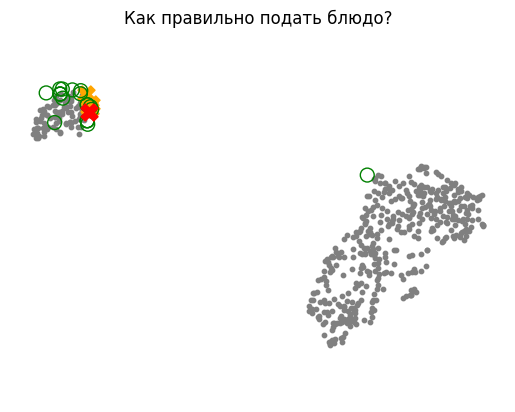

In [ ]:
original_query_embedding = embedding_function([original_query])
augmented_query_embeddings = embedding_function(joint_query)


project_original_query = project_embeddings(original_query_embedding, umap_transform)
project_augmented_queries = project_embeddings(
    augmented_query_embeddings, umap_transform
)

retrieved_embeddings = results["embeddings"]
result_embeddings = [item for sublist in retrieved_embeddings for item in sublist]

projected_result_embeddings = project_embeddings(result_embeddings, umap_transform)

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(
    projected_dataset_embeddings[:, 0],
    projected_dataset_embeddings[:, 1],
    s=10,
    color="gray",
)
plt.scatter(
    project_augmented_queries[:, 0],
    project_augmented_queries[:, 1],
    s=150,
    marker="X",
    color="orange",
)
plt.scatter(
    projected_result_embeddings[:, 0],
    projected_result_embeddings[:, 1],
    s=100,
    facecolors="none",
    edgecolors="g",
)
plt.scatter(
    project_original_query[:, 0],
    project_original_query[:, 1],
    s=150,
    marker="X",
    color="r",
)

plt.gca().set_aspect("equal", "datalim")
plt.title(f"{original_query}")
plt.axis("off")
plt.show()  # display the plot

дополненные эмбеддинги (оранжевые кресты) здесь оказываются между исходным вопросом и извлеченными документами. На плоской проекции многомерного пространства это не всегда очевидно, но представьте себе, что это 384-мерное пространство,

In [ ]:
joint_query

['Как правильно подать блюдо?',
 'Какой тип блюда мы подаем?  ',
 'Какой сервиз или посуду следует использовать?  ',
 'Какое оформление или гарнир лучше всего подходит к этому блюду?']

### Оценка релевантности извлеченных отрывков и выбор лучших:

Нам надо выбрать отрывки из наших документов, наиболее подходящие в качестве  ответа на заданный вопрос.
####Здесь мы будем использовать **CrossEncoder**.
CrossEncoder принимает два предложения/текста в качестве входных данных и предсказывает, насколько вероятно, что это вопрос-ответ. Эта задача использовалась на стадии pretrain моделей BERT, поэтому качество предсказаний должно быть высоким



In [ ]:
from sentence_transformers import CrossEncoder


cross_encoder = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

flat_retrieved_documents = [doc for sublist in retrieved_documents for doc in sublist]

pairs = [(query, doc) for doc in flat_retrieved_documents]
scores = cross_encoder.predict(pairs)

# print("Scores:")
# for score in scores:
#     print(score)

# print("New Ordering:")
# for o in np.argsort(scores)[::-1]:
#     print(o + 1)

original_query = joint_query[0]
#    "Какие факторы были наиболее важными, способствовавшими увеличению доходов?"


generated_queries = joint_query[1:]
    # "What were the major drivers of revenue growth?",
    # "Were there any new product launches that contributed to the increase in revenue?",
    # "Did any changes in pricing or promotions impact the revenue growth?",
    # "What were the key market trends that facilitated the increase in revenue?",
    # "Did any acquisitions or partnerships contribute to the revenue growth?",


# объединим исходный вопрос с созданными вопросами
queries = [original_query] + generated_queries


results = chroma_collection.query(
    query_texts=queries, n_results=10, include=["documents", "embeddings"]
)
retrieved_documents = results["documents"]

# Удалим дубликаты извлеченных документов
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)

unique_documents = list(unique_documents)

# составляем пары исходный вопрос - документ
# с каждым извлеченным документом
pairs = []
for doc in unique_documents:
    pairs.append([original_query, doc])

# вычисляем показатели близости между исходным вопросом и каждым документом
scores = cross_encoder.predict(pairs)



# print("New Ordering:")
# for o in np.argsort(scores)[::-1]:
#     print(o)
# ====
# Отбираем пять самых близких к исходному вопросу документов
top_indices = np.argsort(scores)[::-1][:5]
top_documents = [unique_documents[i] for i in top_indices]

# Объединим пять самых близких документов в единый контекст
context = "\n\n".join(top_documents)


# Генерируем окончательный ответ с использованием LLM
def generate_multi_query(query, context, model='gpt-4o-mini'):

    prompt = f"""
    Вы секретарь приемной коммисии.
    Приведите пример ответа на этот вопрос, который можно найти в таком документе, как особые правила приема.
    """

    messages = [
        {
            "role": "system",
            "content": prompt,
        },
        {
            "role": "user",
            "content": f"Основываясь на следующем контексте:\n\n{context}\n\n Ответье на вопрос: '{query}'. Все ответы должны быть на языке вопроса",
        },
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    # content = content.split("\n")
    return content


res = generate_multi_query(query=original_query, context=context)
print("Исходный вопрос:", original_query)

print("Финальный ответ:")
from IPython.display import Markdown
Markdown(res)

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Исходный вопрос: Как правильно подать блюдо?
Финальный ответ:


Для правильной подачи блюда рекомендуется перевернуть остывший сыр с банки на тарелку, украсить его по желанию. Салат можно подавать как самостоятельное блюдо или заполнить им тарталетки, волованы или эклеры. Обратите внимание, что салат будет выглядеть более апетитно и оригинально, если подобрать подходящую посуду и красиво оформить его перед подачей.